In [1]:
import pandas as pd
import datetime

# 元となる脆弱性のデータ

In [2]:
vul_origin_data = pd.read_csv("./../vulnerability/rubygems_vul_data.csv",delimiter=",")
vul_origin_data

,vulnerability_name,package_name,version_range,published_at,project_id
0,High severity vulnerability that affects sprout,sprout,>=0,2017-10-24T18:33:36Z,254837
1,Moderate severity vulnerability that affects r...,rails,>=2.1.0 <2.3.11 || >=3.0.0 <3.0.4 || >=0 <2.3....,2017-10-24T18:33:38Z,183039
2,actionpack vulnerable to Path Traversal,actionpack,>=3.0.0 <3.2.20 || >=4.0.0 <4.0.11 || >=3.0.0 ...,2017-10-24T18:33:36Z,43083
3,Cross-site Scripting in actionpack,actionpack,>=3.0.0 <3.0.12 || >=3.1.0 <3.1.4 || >=3.0.0 <...,2017-10-24T18:33:38Z,43083
4,Moderate severity vulnerability that affects s...,sprockets,>=0 <2.0.5 || >=2.1.0 <2.1.4 || >=0 <2.0.5 || ...,2017-10-24T18:33:36Z,254753
...,...,...,...,...,...
423,Inline SVG vulnerable to Cross-site Scripting,inline_svg,>=0 <1.7.2,2023-01-07T12:30:14Z,212566
424,ruby-git has potential remote code execution v...,git,>=1.2.0 <1.13.0,2023-01-09T21:55:14Z,205629
425,Denial of service via multipart parsing in Rack,rack,>=2.0.0 <2.0.9 || >=2.1.0 <2.1.4 || >=2.0.0 <2...,2023-01-18T18:19:21Z,237982
426,PgHero Allows Information Disclosure Through E...,pghero,>=0 <3.1.0,2023-01-05T09:30:28Z,234090


## 重複した脆弱性データがないか確認

In [3]:
vul_origin_data.groupby(["vulnerability_name", "package_name", "project_id"]).size().sort_values(ascending=False)

vulnerability_name                                                        package_name        project_id
A crafted ZIP file can cause a denial of service in Rubyzip               rubyzip             247119        1
Octokit gem published with world-writable files                           octokit             230108        1
OS Command Injection in ftpd                                              ftpd                203738        1
OS Command Injection in awesome spawn                                     awesome_spawn       84210         1
OS Command Injection in Rake                                              rake                239884        1
                                                                                                           ..
High severity vulnerability that affects many_versioned_gem               many_versioned_gem  2592200       1
High severity vulnerability that affects mail                             mail                221129        1
High severity v

# 脆弱性影響の解析後データを分析

In [4]:
vul_data = pd.read_csv("./affected_packages_rubygems_with_all.csv",delimiter=",")
vul_data

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_timestamp,vul_end_timestamp,compliantType,vul_start_dependency_compliant,vul_start_version,vul_deps,vul_total_count,source_rank
0,208681,237982,2016-07-12 19:20:50 +0000 UTC,2023-02-03 16:45:47.554357 +0900 JST m=+7.3325...,1468351250,1675410347,1,~> 2.x,2.0.1,0,1,6
1,1587801,237982,2016-07-23 20:41:59 +0000 UTC,2023-02-03 16:45:47.639421 +0900 JST m=+7.4175...,1469306519,1675410347,1,~> 2.0,2.0.1,0,1,7
2,1601346,237982,2016-08-06 21:35:46 +0000 UTC,2023-02-03 16:45:47.685792 +0900 JST m=+7.4639...,1470519346,1675410347,1,~> 2.0,2.0.1,0,1,8
3,210958,237982,2016-08-10 16:29:20 +0000 UTC,2016-11-10 21:55:00 +0000 UTC,1470846560,1478814900,2,>= 0,2.0.1,0,1,13
4,1608374,237982,2016-08-14 00:16:32 +0000 UTC,2023-02-03 16:45:47.728766 +0900 JST m=+7.5069...,1471133792,1675410347,1,~> 2,2.0.1,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
43658,3377912,237982,2018-11-01 17:22:21 +0000 UTC,2018-11-05 20:00:33 +0000 UTC,1541092941,1541448033,1,~> 2.0,2.0.5,0,1,0
43659,3287398,237982,2018-10-05 10:10:16 +0000 UTC,2018-11-05 20:00:33 +0000 UTC,1538734216,1541448033,2,>= 0,1.6.10,0,1,0
43660,3365854,237982,2018-10-28 03:03:06 +0000 UTC,2018-11-05 20:00:33 +0000 UTC,1540695786,1541448033,1,~> 2.0,2.0.5,0,1,0
43661,1842586,237982,2016-12-23 15:44:07 +0000 UTC,2018-11-05 20:00:22 +0000 UTC,1482507847,1541448022,2,>= 0,1.6.5,0,1,4


## 影響を与えたパッケージ数のランキング

In [5]:
vul_data.groupby("vul_project_id").size().sort_values(ascending=False)

vul_project_id
215767    6884
211046    5314
245694    4278
237982    3980
229156    3832
          ... 
850822       1
190742       1
216596       1
267136       1
198068       1
Length: 127, dtype: int64

## 影響を受けた期間を計算

- 脆弱性受け終わりの時刻が現在時刻(2023年1月1日)付近であれば、脆弱性受け終わりの時刻を'2020-01-12 00:00:00'に上書きする
    - データセットの構築時の最新時刻に揃える
    - データセット: https://libraries.io/data

In [6]:
parsed_datetime = datetime.datetime(2023, 1, 1, 0, 0, 0, 0)
vul_end_last_datetime = datetime.datetime(2020, 1, 12, 0, 0, 0, 0)

vul_data["vul_end_datetime"] = vul_data["vul_end_datetime"].where(vul_data["vul_end_timestamp"] < parsed_datetime.timestamp(), vul_end_last_datetime.strftime('%Y-%m-%d %H:%M:%S'))
vul_data["vul_end_timestamp"] = vul_data["vul_end_timestamp"].where(vul_data["vul_end_timestamp"] < parsed_datetime.timestamp(), vul_end_last_datetime.timestamp())
vul_data["vul_months"] = (vul_data["vul_end_timestamp"] - vul_data["vul_start_timestamp"]) / (3600 * 24 * 30)
vul_data
vul_data["status"] = vul_data["vul_end_timestamp"] < vul_end_last_datetime.timestamp()

## データの分布


### 脆弱性の存続期間

<AxesSubplot: >

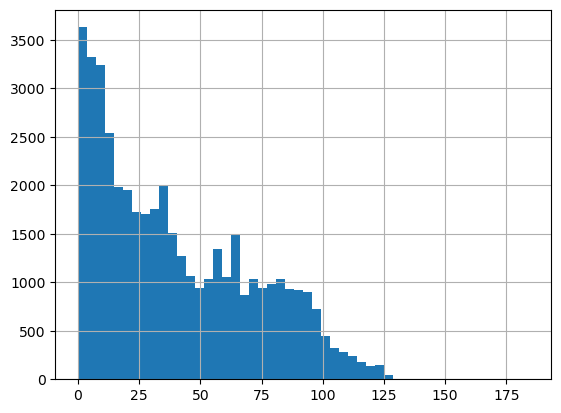

In [7]:
vul_data["vul_months"].hist(bins=50)

### semver準拠タイプごとの影響を受けたパッケージ数

- 1: (本番開発リリース)準拠している
- 2: (本番開発リリース)semverより緩い制約
- 3: (本番開発リリース)semverより厳しい制約
- 4: (初期開発リリース)準拠している
- 5: (初期開発リリース)semverより緩い制約

In [8]:
vul_data.groupby("compliantType").size()

compliantType
1     8496
2    16239
3     4317
4      874
5    13737
dtype: int64

# サバイバル分析

- ドキュメント: https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.nonparametric.kaplan_meier_estimator.html
    - Kaplan-Meier推定
        - https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%97%E3%83%A9%E3%83%B3%EF%BC%9D%E3%83%9E%E3%82%A4%E3%83%A4%E3%83%BC%E6%8E%A8%E5%AE%9A%E9%87%8F
    - 打ち切りデータもあってよい

In [9]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
import numpy as np

In [10]:
vul_data_compliant = vul_data[vul_data["compliantType"] == 1]
vul_data_permissive = vul_data[vul_data["compliantType"] == 2]
vul_data_restrictive = vul_data[vul_data["compliantType"] == 3]

### 生存関数

- 期間が長くなっても、Compliantな脆弱性が他に比べて生き残っている

Text(0.5, 0, 'time $t$')

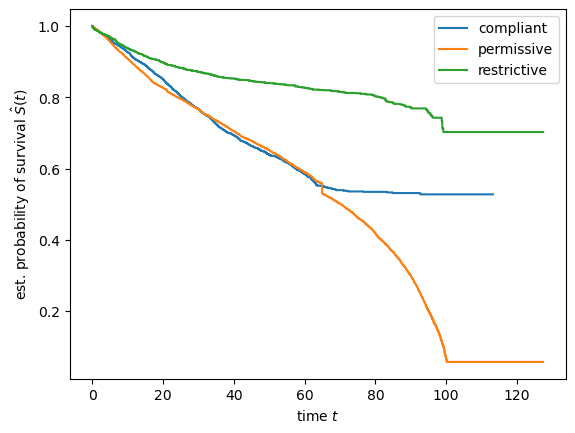

In [11]:
cph_compliant = CoxPHFitter()
cph_compliant.fit(pd.concat([vul_data_compliant["vul_months"], vul_data_compliant["status"].map(lambda x: 1 if x else 0),
                             # vul_data_compliant["project_id"]
                             ], axis=1), "vul_months", "status",
                  # weights_col="project_id",
                  robust=True)
survival_f_compliant = cph_compliant.predict_survival_function(np.arange(0, 100, 1000))


cph_permissive = CoxPHFitter()
cph_permissive.fit(pd.concat([vul_data_permissive["vul_months"], vul_data_permissive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_permissive = cph_permissive.predict_survival_function(np.arange(0, 100, 1000))

cph_restrictive = CoxPHFitter()
cph_restrictive.fit(pd.concat([vul_data_restrictive["vul_months"], vul_data_restrictive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_restrictive = cph_restrictive.predict_survival_function(np.arange(0, 100, 1000))


plt.step(survival_f_compliant.index, survival_f_compliant[0], where="post", label="compliant")
plt.step(survival_f_permissive.index, survival_f_permissive[0], where="post", label="permissive")
plt.step(survival_f_restrictive.index, survival_f_restrictive[0], where="post", label="restrictive")

plt.legend()

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Text(0.5, 0, 'time $t$ [month]')

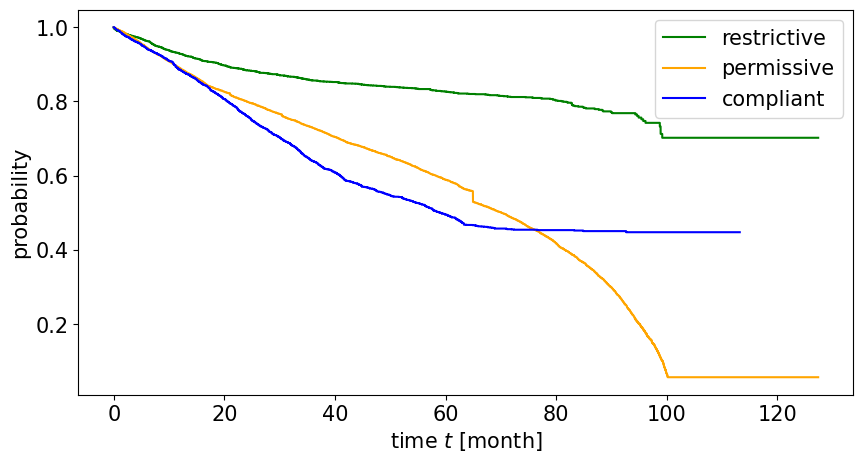

In [12]:
cph_compliant = CoxPHFitter()
cph_compliant.fit(pd.concat([vul_data_compliant["vul_months"], vul_data_compliant["status"].map(lambda x: 1 if x else 0),
                             vul_data_compliant["project_id"]
                             ], axis=1), "vul_months", "status",
                  weights_col="project_id",
                  robust=True)
survival_f_compliant = cph_compliant.predict_survival_function(np.arange(0, 100, 1000))


cph_permissive = CoxPHFitter()
cph_permissive.fit(pd.concat([vul_data_permissive["vul_months"], vul_data_permissive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_permissive = cph_permissive.predict_survival_function(np.arange(0, 100, 1000))

cph_restrictive = CoxPHFitter()
cph_restrictive.fit(pd.concat([vul_data_restrictive["vul_months"], vul_data_restrictive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_restrictive = cph_restrictive.predict_survival_function(np.arange(0, 100, 1000))

plt.rcParams["font.size"] = 15
plt.figure(figsize=[10, 5])
plt.step(survival_f_restrictive.index, survival_f_restrictive[0], where="post", label="restrictive", color="green")
plt.step(survival_f_permissive.index, survival_f_permissive[0], where="post", label="permissive", color="orange")
plt.step(survival_f_compliant.index, survival_f_compliant[0], where="post", label="compliant", color="blue")

plt.legend()

plt.ylabel("probability")
plt.xlabel("time $t$ [month]")

## 準拠タイプごとに脆弱性影響の生存期間を分析

### Compliant

In [13]:
vul_data_compliant["vul_months"].describe()

count    8496.000000
mean       30.163836
std        24.638101
min        -0.036926
25%         9.051177
50%        25.131428
75%        46.620162
max       113.211115
Name: vul_months, dtype: float64

<AxesSubplot: >

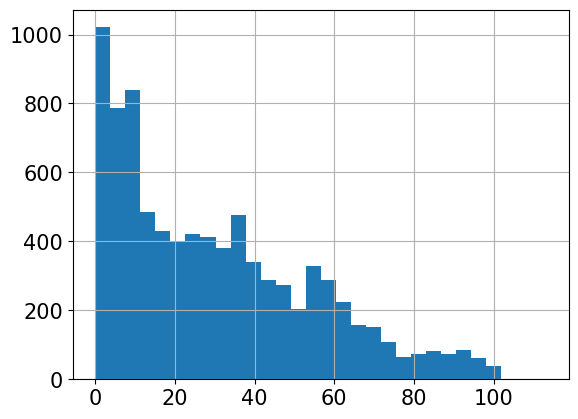

In [14]:
vul_data_compliant["vul_months"].hist(bins=30)

### Permissive

- Compliantより生存期間が長い
    - なんで？

In [15]:
vul_data_permissive["vul_months"].describe()

count    16239.000000
mean        40.355415
std         31.422248
min         -0.027008
25%         10.720656
50%         33.896934
75%         68.153785
max        127.395794
Name: vul_months, dtype: float64

<AxesSubplot: >

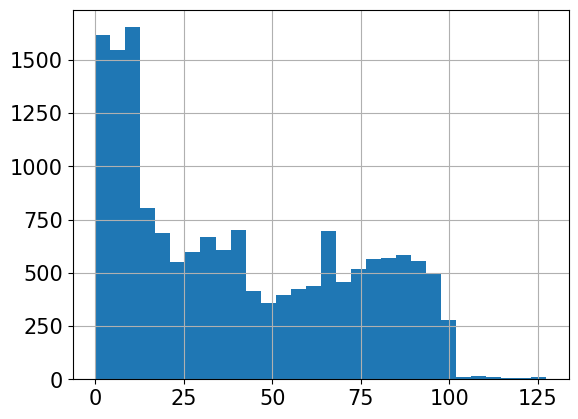

In [16]:
vul_data_permissive["vul_months"].hist(bins=30)

### Restrictive

<AxesSubplot: >

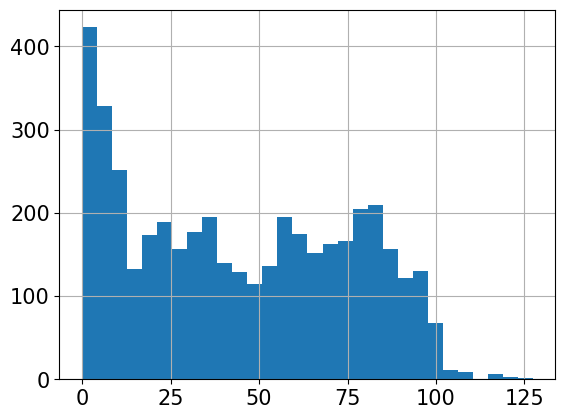

In [17]:
vul_data_restrictive["vul_months"].hist(bins=30)

In [18]:
vul_data_restrictive["vul_months"].describe()

count    4317.000000
mean       44.622043
std        30.955136
min        -0.043409
25%        14.776881
50%        42.108448
75%        72.249062
max       127.395782
Name: vul_months, dtype: float64

<AxesSubplot: >

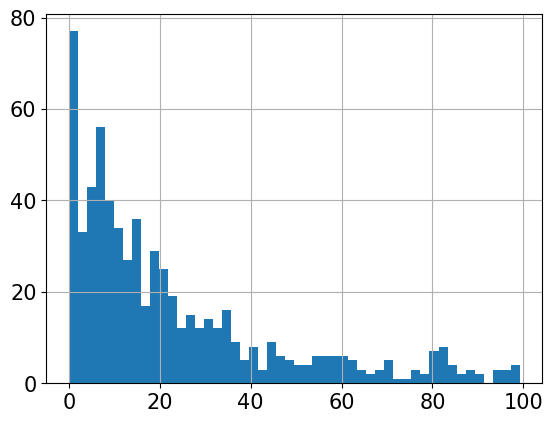

In [19]:
vul_data_restrictive["vul_months"][vul_data_restrictive["vul_end_timestamp"] < vul_end_last_datetime.timestamp()].hist(bins=50)